In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import scipy.interpolate as interp
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 30 
plt.rcParams['axes.labelpad'] = 16 

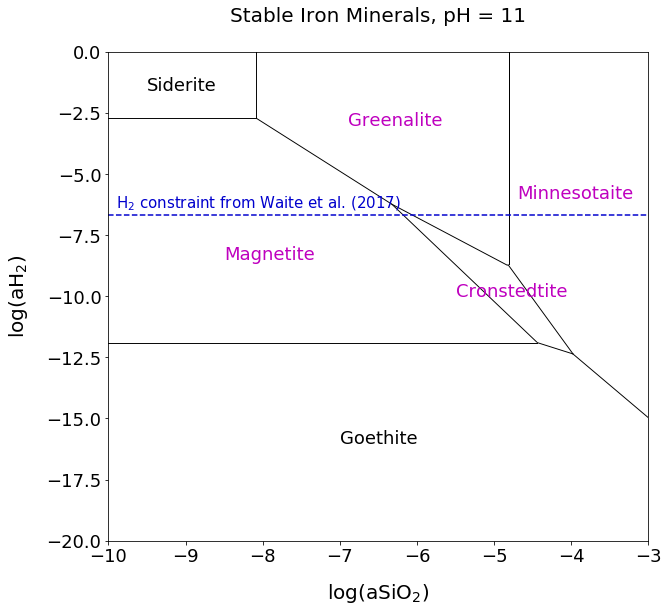

In [2]:
#Mineral State Plots

#pH11
#Iron
CO2 = 10**-7
K11_Fe = np.zeros(10)

#Geothite >> Minnesotaite
K11_Fe[0] = 11.4844
aSi11_Fe0 = np.arange(-3.98, 0, 0.01) 
y11_Fe0 = 2*(-K11_Fe[0] - 1.333*aSi11_Fe0)

#Geothite >> Magnetite
K11_Fe[1] = 1.9832
aSi11_Fe1 = np.arange(-10,-4.44,0.01)
y11_Fe1 = np.zeros(len(aSi11_Fe1))
y11_Fe1[0:] = -6*K11_Fe[1]

#Geothite >> Cronstedtite
K11_Fe[2] = 4.0848
aSi11_Fe2 = np.arange(-4.44, -3.98, 0.01)
y11_Fe2 = -4*K11_Fe[2] -  aSi11_Fe2 

#Magnetite >> Cronstedtite
K11_Fe[3] = 6.3048
aSi11_Fe3 = np.arange(-6.33, -4.44, 0.01)
y11_Fe3 = -4*K11_Fe[3] - 3*aSi11_Fe3

#Magnetite >> Siderite
K11_Fe[4] = 23.7233
aSi11_Fe4 = np.arange(-10, -8.08, 0.01)
y11_Fe4 = np.zeros(len(aSi11_Fe4))
y11_Fe4[0:] = -K11_Fe[4] - 3*np.log10(CO2)

#Magnetite >> Greenalite
K11_Fe[5] = 18.8931
aSi11_Fe5 = np.arange(-8.08, -6.33, 0.01)
y11_Fe5 = -K11_Fe[5] - 2*aSi11_Fe5

#Greenalite >> Minnesotaite
K11_Fe[6] = 9.6106
y11_Fe6 = np.zeros(20)
y11_Fe6[0:] = -(1/2)*K11_Fe[6] 

#Cronstedtite >> Minnesotaite
K11_Fe[7] = 29.5985
aSi11_Fe7 = np.arange(-4.82, -3.98, 0.01)
y11_Fe7 = (1/3)*(-3*K11_Fe[7] - 13*aSi11_Fe7) 

#Greenalite >> Siderite
K11_Fe[8] = -1.6101
y11_Fe8 = (1/2)*(3*np.log10(CO2) - 3*K11_Fe[8])

#Cronstedtite >> Greenalite
K11_Fe[9] = 16.7843
aSi11_Fe9 = np.arange(-6.33, -4.82, 0.01)
y11_Fe9 = -K11_Fe[9] - (5/3)*aSi11_Fe9

fig1 = plt.figure(1)
fig1.set_figheight(9)
fig1.set_figwidth(10)
plt.clf()
plt.plot(aSi11_Fe0, y11_Fe0, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe1, y11_Fe1, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe2, y11_Fe2, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe3, y11_Fe3, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe4, y11_Fe4, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe5, y11_Fe5, color = 'black', linewidth = 0.95)
plt.plot([y11_Fe6,y11_Fe6], [-8.70,0], color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe7, y11_Fe7, color = 'black', linewidth = 0.95)
plt.plot([y11_Fe8,y11_Fe8], [y11_Fe4[0], 0], color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe9, y11_Fe9, color = 'black', linewidth = 0.95)
plt.text(-9.5, -1.6, 'Siderite', fontsize = 18)
plt.text(-6.9, -3.0, 'Greenalite', fontsize = 18, color = 'm')
plt.text(-8.5, -8.5, 'Magnetite', fontsize = 18, color = 'm')
plt.text(-5.5, -10, 'Cronstedtite', fontsize = 18, color = 'm')
plt.text(-4.7, -6, 'Minnesotaite', fontsize = 18, color = 'm')
plt.text(-7, -16, 'Goethite', fontsize = 18)
plt.plot([-10,0],[np.log10(2*10**-7), np.log10(2*10**-7)], '--', color = 'mediumblue')
plt.text(-9.9, -6.4, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 15)
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2$)')
plt.title("Stable Iron Minerals, pH = 11") 
plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
plt.subplots_adjust(left=0.15)
plt.savefig('Iron_pH11')


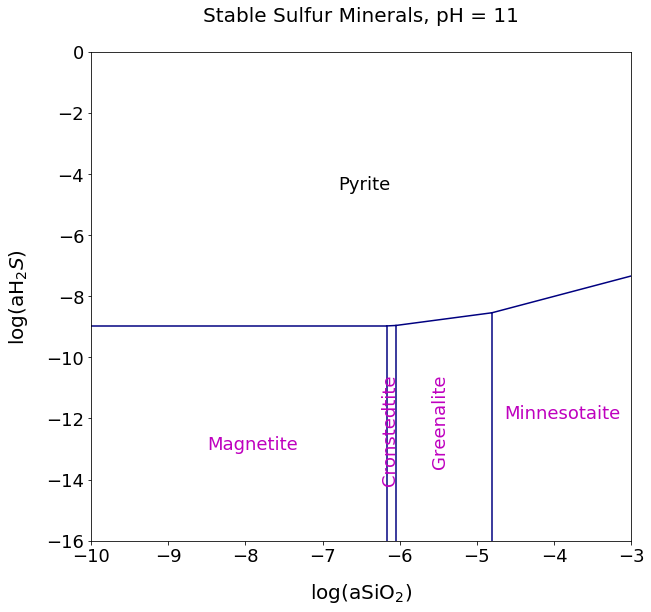

In [3]:

#Sulfur
K11_S = np.zeros(7)
H2 = 2 * 10**-7

#Magnetite >> Pyrite
K11_S[0] = 40.4419
aSi11_S0 = np.arange(-10, -6.17, 0.01)
y11_S0 = np.zeros(len(aSi11_S0))
y11_S0[0:] = (1/6)*(-K11_S[0] + 2*np.log10(H2))

#Cronstedtite >> Pyrite
K11_S[1] = 45.5160
aSi11_S1 = np.arange(-6.17, -6.05, 0.01)
y11_S1 = (1/8)*(-K11_S[1] + aSi11_S1 + 3*np.log10(H2))

#Greenalite >> Pyrite
K11_S[2] = 21.5488
aSi11_S2 = np.arange(-6.05, -4.81, 0.01)
y11_S2 = (1/6)*(-K11_S[2] + 2*aSi11_S2 + 3*np.log10(H2))

#Minnesotaite >> Pyrite
K11_S[3] = 11.9382
aSi11_S3 = np.arange(-4.81, 0, 0.01)
y11_S3 = (1/6)*(-K11_S[3] + 4*aSi11_S3 + 3*np.log10(H2))


fig2 = plt.figure(2)
fig2.set_figheight(9)
fig2.set_figwidth(10)
plt.clf()
plt.plot(aSi11_S0, y11_S0, color = 'navy')
plt.plot(aSi11_S1, y11_S1, color = 'navy')
plt.plot(aSi11_S2, y11_S2, color = 'navy')
plt.plot(aSi11_S3, y11_S3, color = 'navy')
plt.plot([-6.17, -6.17], [-16, y11_S0[0]], color = 'navy')
plt.plot([-6.05, -6.05], [-16, -8.96], color = 'navy')
plt.plot([-4.81, -4.81], [-16, -8.54], color = 'navy')
plt.text(-6.8, -4.5, 'Pyrite', fontsize = 18)
plt.text(-8.5, -13, 'Magnetite', fontsize = 18, color = 'm')
plt.text(-4.65, -12, 'Minnesotaite', fontsize = 18, color = 'm')
plt.text(-6.24, -11, 'Cronstedtite', fontsize = 18, rotation = 90, color = 'm')
plt.text(-5.6, -11, 'Greenalite', fontsize = 18, rotation = 90, color = 'm')
plt.xlim(-10,-3)
plt.ylim(-16,0)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2S$)')
plt.title("Stable Sulfur Minerals, pH = 11") 
#plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
#plt.subplots_adjust(left=0.2, right=0.85, top=0.8, bottom=0.15)
plt.subplots_adjust(left=0.15)
plt.savefig('Sulfur_pH11')


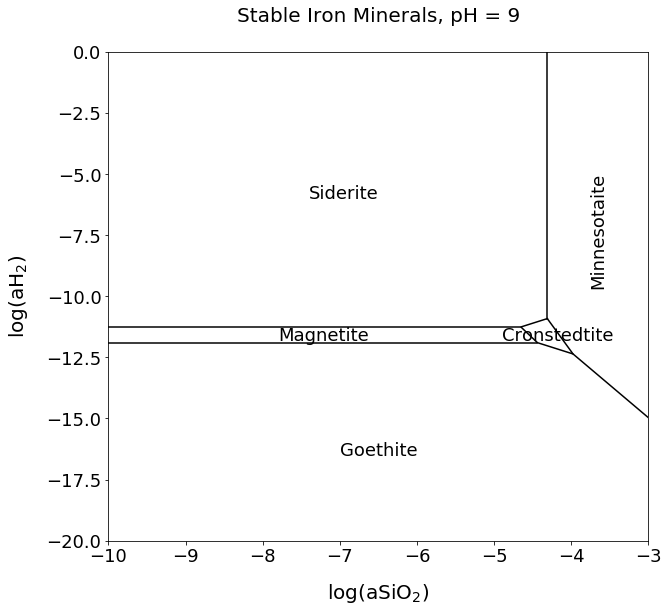

In [4]:


#pH9
K9_Fe = np.zeros(7)
CO2 = 7 * 10**-5

#Goethite >> Magnetite
K9_Fe[0] = 1.9832
aSi9_Fe0 = np.arange(-10, -4.44, 0.01)
y9_Fe0 = np.zeros(len(aSi9_Fe0))
y9_Fe0[0:] = -6*K9_Fe[0]

#Goethite >> Cronstedtite
K9_Fe[1] = 4.0848
aSi9_Fe1 = np.arange(-4.44, -3.98, 0.01)
y9_Fe1 = -4*K9_Fe[1] - aSi9_Fe1

#Goethite >> Minnesotaite
K9_Fe[2] = 11.4844
aSi9_Fe2 = np.arange(-3.98, 0, 0.01)
y9_Fe2 = (1/3)*(-6*K9_Fe[2] - 8*aSi9_Fe2)

#Magnetite >> Siderite
K9_Fe[3] = 23.7233
aSi9_Fe3 = np.arange(-10, -4.65, 0.01)
y9_Fe3 = np.zeros(len(aSi9_Fe3))
y9_Fe3[0:] = -K9_Fe[3] - 3*np.log10(CO2)

#Magnetite >> Cronstedtite
K9_Fe[4] = 6.3048
aSi9_Fe4 = np.arange(-4.65, -4.44, 0.01)
y9_Fe4 = -4*K9_Fe[4] - 3*aSi9_Fe4

#Siderite >> Cronstedtite
K9_Fe[5] = -5.8062
aSi9_Fe5 = np.arange(-4.65, -4.31, 0.01)
y9_Fe5 = 4*K9_Fe[5] - 4*np.log10(CO2) + aSi9_Fe5

#Minnesotaite >> Cronstedtite
K9_Fe[6] = -22.1989
aSi9_Fe6 = np.arange(-4.31, -3.98, 0.01)
y9_Fe6 = (1/3)*(4*K9_Fe[6] - 13*aSi9_Fe6)

fig3 = plt.figure(3)
fig3.set_figheight(9)
fig3.set_figwidth(10)
plt.clf()
plt.plot(aSi9_Fe0, y9_Fe0, color = 'black')
plt.plot(aSi9_Fe1, y9_Fe1, color = 'black')
plt.plot(aSi9_Fe2, y9_Fe2, color = 'black')
plt.plot(aSi9_Fe3, y9_Fe3, color = 'black')
plt.plot(aSi9_Fe4, y9_Fe4, color = 'black')
plt.plot(aSi9_Fe5, y9_Fe5, color = 'black')
plt.plot(aSi9_Fe6, y9_Fe6, color = 'black')
plt.plot([-4.31, -4.31], [-10.915, 0], color = 'black')
plt.text(-7.4, -6, 'Siderite', fontsize = 18, color = 'black')
plt.text(-7.8, -11.8, 'Magnetite', fontsize = 18)
plt.text(-4.9, -11.8, 'Cronstedtite', fontsize = 18)
plt.text(-3.77, -5.5, 'Minnesotaite', fontsize = 18, rotation = 90, color = 'black')
plt.text(-7, -16.5, 'Goethite', fontsize = 18)
#Plot horizontal lines for hydrogen activity
#plt.plot([-10,0],[np.log10(1*10**-4), np.log10(1*10**-4)], '--', color = 'mediumblue')
#plt.text(-9.9, -3.7, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 15)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2$)')
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.title("Stable Iron Minerals, pH = 9") 
#plt.show()
plt.subplots_adjust(left=0.15)
plt.savefig('Iron9.png')

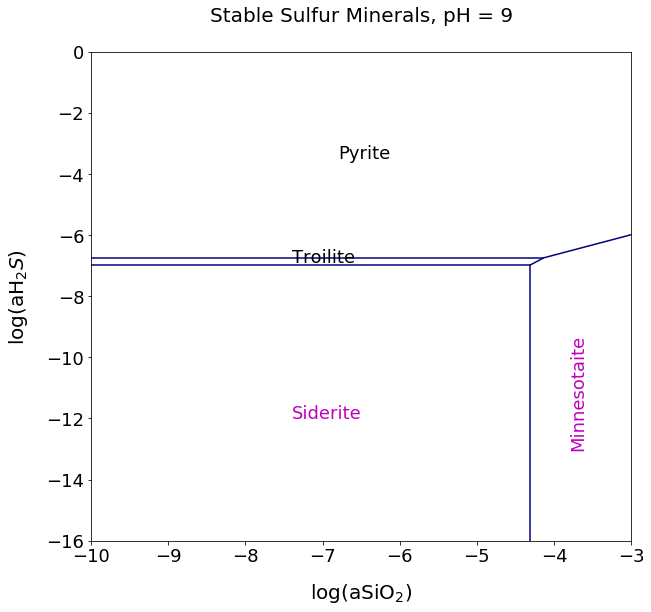

In [5]:

#Sulfur
H2 = 1 * 10**-4
K9_S = np.zeros(4)

#Siderite >> Troilite
K9_S[0] = 2.8283
aSi9_S0 = np.arange(-10, -4.31, 0.01)
y9_S0 = np.zeros(len(aSi9_S0))
y9_S0[0:] = np.log10(CO2) - K9_S[0]

#Troilite >> Pyrite
K9_S[1] = 2.7445
aSi9_S1 = np.arange(-10, -4.13, 0.01)
y9_S1 = np.zeros(len(aSi9_S1))
y9_S1[0:] = np.log10(H2) - K9_S[1]

#Troilite >> Minnesotaite
K9_S[2] = -1.2348
aSi9_S2 = np.arange(-4.31, -4.13, 0.01)
y9_S2 = (1/3)*(3*K9_S[2] + 4*aSi9_S2)

#Pyrite >> Minnesotaite
K9_S[3] = -3.9794
aSi9_S3 = np.arange(-4.13, 0, 0.01)
y9_S3 = (1/6)*(3*K9_S[3] + 3*np.log10(H2) + 4*aSi9_S3)

fig4 = plt.figure(4)
fig4.set_figheight(9)
fig4.set_figwidth(10)
plt.clf()
plt.plot(aSi9_S0, y9_S0, color = 'navy')
plt.plot(aSi9_S1, y9_S1, color = 'navy')
plt.plot(aSi9_S2, y9_S2, color = 'navy')
plt.plot(aSi9_S3, y9_S3, color = 'navy')
plt.plot([-4.31, -4.31], [-16, -6.9832], color = 'navy')
plt.text(-6.8, -3.5, 'Pyrite', fontsize = 18)
plt.text(-7.4, -6.9, 'Troilite', fontsize = 18)
plt.text(-7.4, -12, 'Siderite', fontsize = 18, color = 'm')
plt.text(-3.80, -9.7, 'Minnesotaite', fontsize = 18, color = 'm', rotation = 90)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2S$)')
plt.xlim(-10,-3)
plt.ylim(-16,0)
plt.title("Stable Sulfur Minerals, pH = 9") 
#plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
plt.subplots_adjust(left=0.15)
#plt.subplots_adjust(left=0.2, right=0.85, top=0.8, bottom=0.15)
plt.savefig('Sulfur9.png')


NameError: name 'x_ticks' is not defined

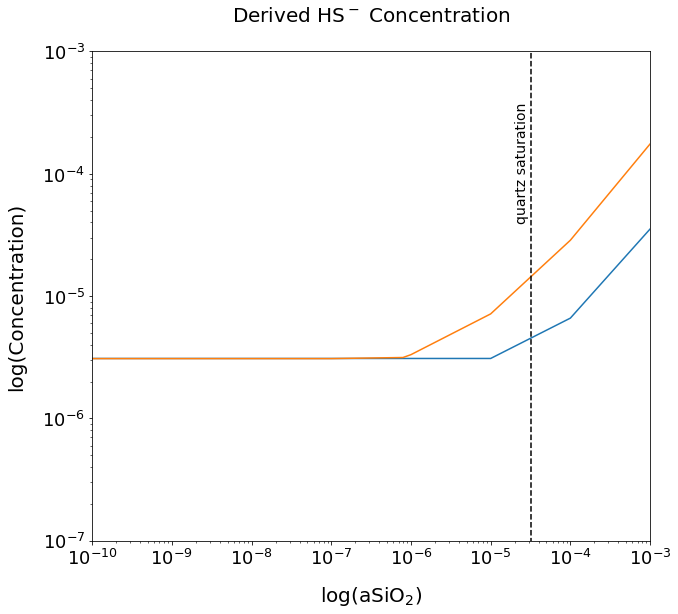

In [6]:


#Now plot predicted Fe2+ and HS concentrations
#pH9
SiO2_9 = np.logspace(-10, -3, 8) #log value

Fe_9 = np.array([1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 6.237*10**-7, 2.912*10**-8])

HS_9 = np.array([3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 6.605*10**-6, 3.535*10**-5])


#pH 11
SiO2_11 = np.array([10**-10, 10**-9, 10**-8, 10**-7, 10**-6.1, 10**-6, 10**-5, 10**-4, 10**-3])

Fe_11 = np.array([1.374*10**-9, 1.374*10**-9, 1.374*10**-9, 1.374*10**-9, 1.319*10**-9, 1.185*10**-9, 2.553*10**-10, 1.598*10**-11, 1.323*10**-12])

HS_11 = np.array([3.082*10**-6, 3.082*10**-6, 3.082*10**-6, 3.082*10**-6, 3.146*10**-6, 3.319*10**-6, 7.151*10**-6, 2.862*10**-5, 1.753*10**-4])

#Constrain H2S concentration from INMS
H2S_upper = (100/(10**6)) * (34.08/18.015) #ppm - 1 g per 10^6 g H2O
#print(H2S_upper)

#Saturation States:
quartz = 10**-4.5
trid = 10**-4.3
chal = 10**-4.2
cris = 10**-3.89

y_ticks = np.ndarray.tolist(np.logspace(-12,-2,6))
y_labels = np.ndarray.tolist(np.arange(-12,0,2))

#interpolate over curves
SiO2_int = np.logspace(-10, -3, 100)
f_HS9 = interp.interp1d(SiO2_9, HS_9, kind = 'linear')
HS9_int = f_HS9(SiO2_int)
f_HS11 = interp.interp1d(SiO2_11, HS_11, kind = 'linear')
HS11_int = f_HS11(SiO2_int)
f_Fe9 = interp.interp1d(SiO2_9, Fe_9, kind = 'linear')
Fe9_int = f_Fe9(SiO2_int)
f_Fe11 = interp.interp1d(SiO2_11, Fe_11, kind = 'linear')
Fe11_int = f_Fe11(SiO2_int)


fig5 = plt.figure(5)
fig5.set_figheight(9)
fig5.set_figwidth(10)
plt.clf()
plt.loglog(SiO2_9, HS_9, label = 'pH = 9')
plt.loglog(SiO2_11, HS_11, label = 'pH = 11')
plt.plot([quartz, quartz], [10**-14, 10**-2], 'k--')
plt.text(10**-4.7, 10**-3.5, 'quartz saturation', fontsize = 14, rotation = 90)
#plt.plot([10**-10, 10**0], [H2S_upper, H2S_upper], 'k--')
#plt.text(10**-9.5, 10**-3.5, 'H$_2$S upper limit from INMS', fontsize = 14)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(Concentration)')
plt.title('Derived HS$^-$ Concentration')
plt.xlim(10**-10,10**-3)
plt.ylim(10**-7, 10**-3)
plt.xticks(x_ticks, x_labels)
#plt.yticks(y_ticks, y_labels)
plt.setp(ax.get_yticklabels(), visible=False)
plt.legend(bbox_to_anchor=(0.3,0.2), prop={'size': 18})
plt.subplots_adjust(left=0.15)
plt.grid()
plt.savefig('SulfurConc')


fig6 = plt.figure(6)
fig6.set_figheight(9)
fig6.set_figwidth(10)
plt.clf()
plt.loglog(SiO2_9, Fe_9, label = 'pH = 9')
plt.plot([quartz, quartz], [10**-14, 10**-2], 'k--')
plt.loglog(SiO2_11, Fe_11, label = 'pH = 11')
plt.text(10**-4.7, 10**-3.2, 'quartz saturation', fontsize = 14, rotation = 90)
plt.xlabel('log(aSiO$_2$)]')
plt.ylabel('log(Concentration)')
plt.title('Derived Fe$^{2+}$ Concentration')
plt.xlim(10**-10,10**-3)
plt.ylim(10**-12, 10**-2)
plt.xticks(x_ticks, x_labels)
#plt.yticks(y_ticks, y_labels)
plt.legend(bbox_to_anchor=(0.3,0.2), prop={'size': 18})
plt.subplots_adjust(left=0.15)
plt.grid()
plt.savefig('IronConc')

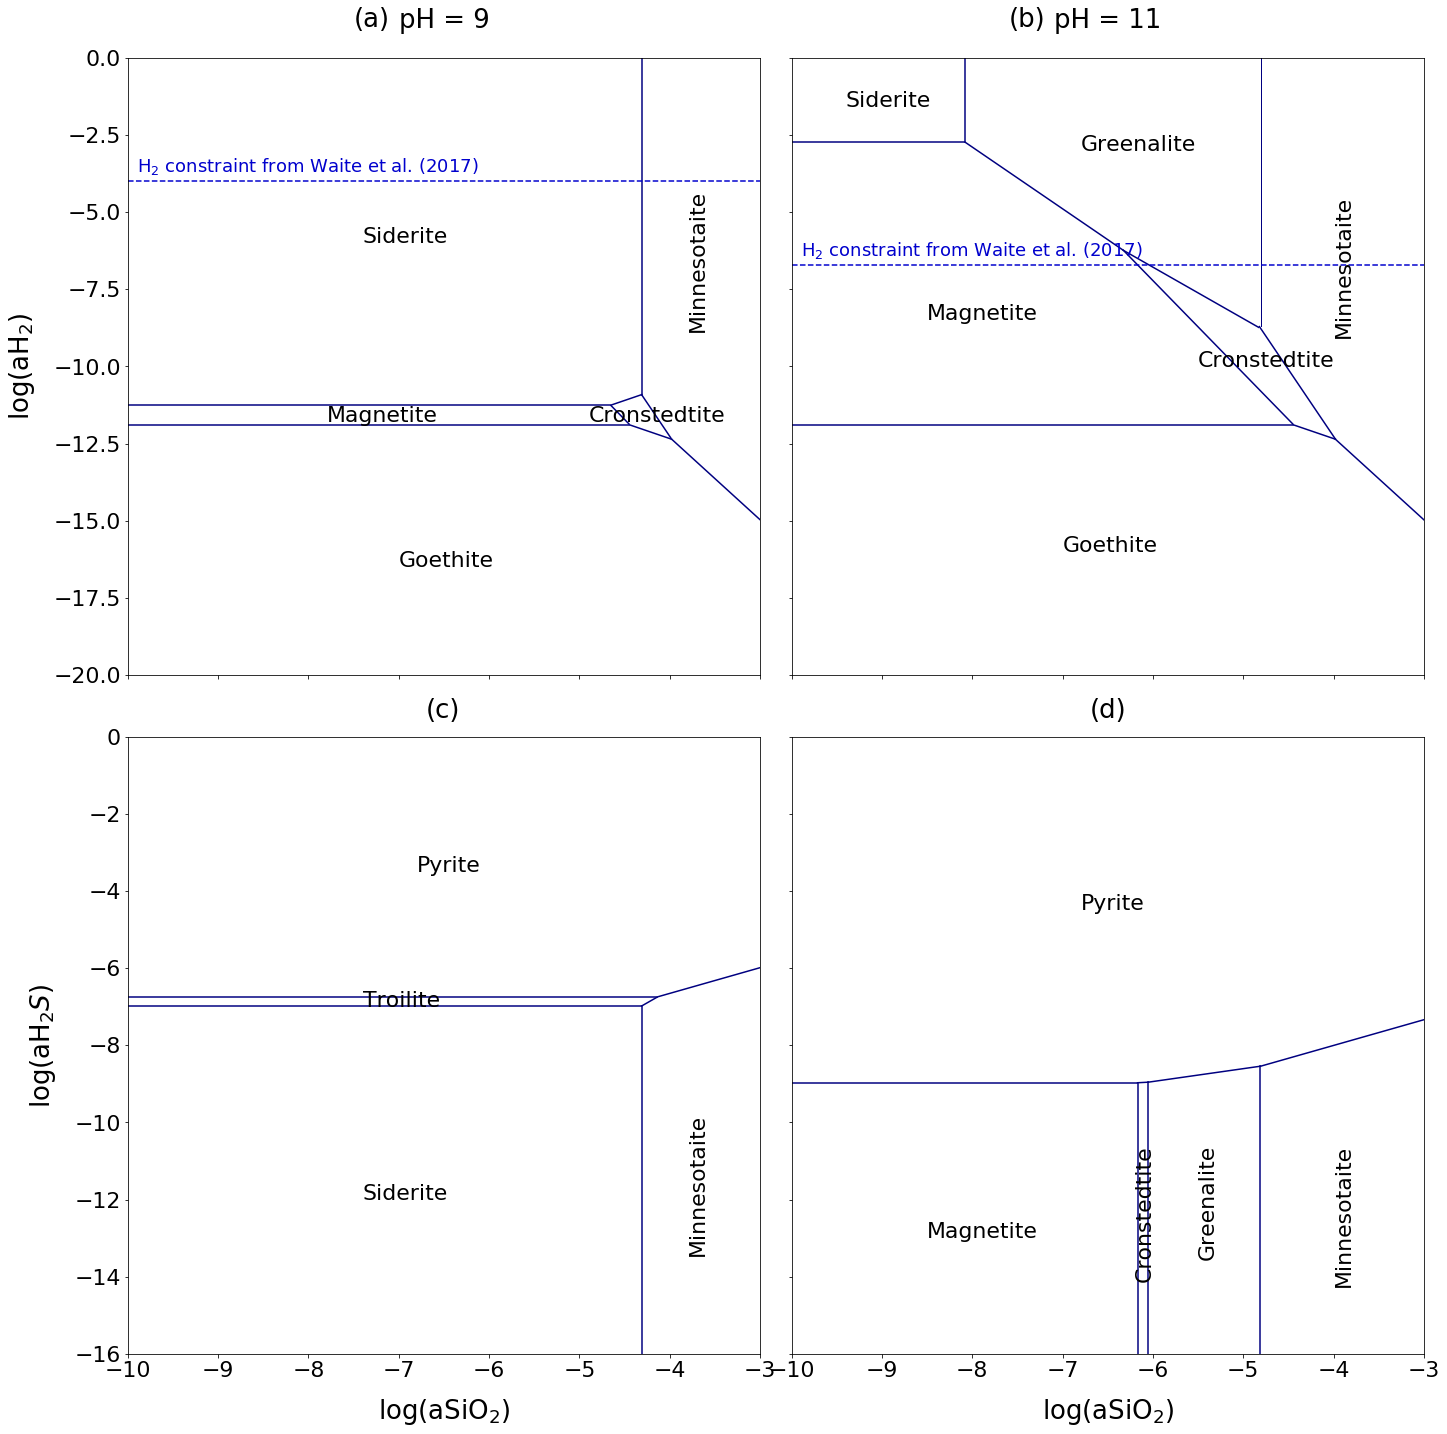

In [7]:
#Combine into subplots
plt.rcParams['axes.titlesize'] = 26  
plt.rcParams['axes.labelsize'] = 26  
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.figure(7)
ax = plt.subplot(221) 
plt.plot(aSi9_Fe0, y9_Fe0, color = 'navy')
plt.plot(aSi9_Fe1, y9_Fe1, color = 'navy')
plt.plot(aSi9_Fe2, y9_Fe2, color = 'navy')
plt.plot(aSi9_Fe3, y9_Fe3, color = 'navy')
plt.plot(aSi9_Fe4, y9_Fe4, color = 'navy')
plt.plot(aSi9_Fe5, y9_Fe5, color = 'navy')
plt.plot(aSi9_Fe6, y9_Fe6, color = 'navy')
plt.plot([-4.31, -4.31], [-10.915, 0], color = 'navy')
plt.text(-7.4, -6, 'Siderite', fontsize = 22)
plt.text(-7.8, -11.8, 'Magnetite', fontsize = 22)
plt.text(-4.9, -11.8, 'Cronstedtite', fontsize = 22)
plt.text(-3.8, -4.8, 'Minnesotaite', fontsize = 22, rotation = 90)
plt.text(-7, -16.5, 'Goethite', fontsize = 22)
#Plot horizontal lines for hydrogen activity
plt.plot([-10,0],[np.log10(1*10**-4), np.log10(1*10**-4)], '--', color = 'mediumblue')
plt.text(-9.9, -3.7, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 18)
plt.text(-7.5,1,'(a)',fontsize=26)
plt.ylabel('log(aH$_2$)')
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.title("pH = 9") 
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(222) 
plt.plot(aSi11_Fe0, y11_Fe0, color = 'navy')
plt.plot(aSi11_Fe1, y11_Fe1, color = 'navy')
plt.plot(aSi11_Fe2, y11_Fe2, color = 'navy')
plt.plot(aSi11_Fe3, y11_Fe3, color = 'navy')
plt.plot(aSi11_Fe4, y11_Fe4, color = 'navy')
plt.plot(aSi11_Fe5, y11_Fe5, color = 'navy')
plt.plot([y11_Fe6,y11_Fe6], [-8.70,0], color = 'navy', linewidth = 0.8)
plt.plot(aSi11_Fe7, y11_Fe7, color = 'navy')
plt.plot([y11_Fe8,y11_Fe8], [y11_Fe4[0], 0], color = 'navy')
plt.plot(aSi11_Fe9, y11_Fe9, color = 'navy')
plt.text(-9.4, -1.6, 'Siderite', fontsize = 22)
plt.text(-6.8, -3.0, 'Greenalite', fontsize = 22)
plt.text(-8.5, -8.5, 'Magnetite', fontsize = 22)
plt.text(-5.5, -10, 'Cronstedtite', fontsize = 22)
plt.text(-4.0, -5, 'Minnesotaite', fontsize = 22, rotation = 90)
plt.text(-7, -16, 'Goethite', fontsize = 22)
plt.plot([-10,0],[np.log10(2*10**-7), np.log10(2*10**-7)], '--', color = 'mediumblue')
plt.text(-9.9, -6.4, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 18)
plt.text(-7.6,1,'(b)',fontsize=26)
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.title("pH = 11")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(223) 
plt.plot(aSi9_S0, y9_S0, color = 'navy')
plt.plot(aSi9_S1, y9_S1, color = 'navy')
plt.plot(aSi9_S2, y9_S2, color = 'navy')
plt.plot(aSi9_S3, y9_S3, color = 'navy')
plt.plot([-4.31, -4.31], [-16, -6.9832], color = 'navy')
plt.text(-6.8, -3.5, 'Pyrite', fontsize = 22)
plt.text(-7.4, -7.0, 'Troilite', fontsize = 22)
plt.text(-7.4, -12, 'Siderite', fontsize = 22)
plt.text(-3.8, -10.2, 'Minnesotaite', fontsize = 22, rotation = 90)
plt.text(-6.7,0.5,'(c)',fontsize=26)
plt.ylabel('log(aH$_2S$)')
plt.xlabel('log(aSiO$_2$)')
plt.xlim(-10,-3)
plt.ylim(-16,0)
plt.setp(ax.get_xticklabels(), visible=True)

ax = plt.subplot(224) 
plt.plot(aSi11_S0, y11_S0, color = 'navy')
plt.plot(aSi11_S1, y11_S1, color = 'navy')
plt.plot(aSi11_S2, y11_S2, color = 'navy')
plt.plot(aSi11_S3, y11_S3, color = 'navy')
plt.plot([-6.17, -6.17], [-16, y11_S0[0]], color = 'navy')
plt.plot([-6.05, -6.05], [-16, -8.96], color = 'navy')
plt.plot([-4.81, -4.81], [-16, -8.54], color = 'navy')
plt.text(-6.8, -4.5, 'Pyrite', fontsize = 22)
plt.text(-8.5, -13, 'Magnetite', fontsize = 22)
plt.text(-4, -11, 'Minnesotaite', fontsize = 22, rotation = 90)
plt.text(-6.2, -11, 'Cronstedtite', fontsize = 22, rotation = 90)
plt.text(-5.5, -11, 'Greenalite', fontsize = 22, rotation = 90)
plt.text(-6.7,0.5,'(d)',fontsize=26)
plt.xlim(-10,-3)
plt.ylim(-16,0)
plt.xlabel('log(aSiO$_2$)')
plt.setp(ax.get_xticklabels(), visible=True)
plt.setp(ax.get_yticklabels(), visible=False)



plt.subplots_adjust(left = 1.0, bottom=-1, right=4.0, top=3.5,
                 wspace=0.05, hspace=0.1)
plt.savefig('IronandSulfurMineralsPUB.png')



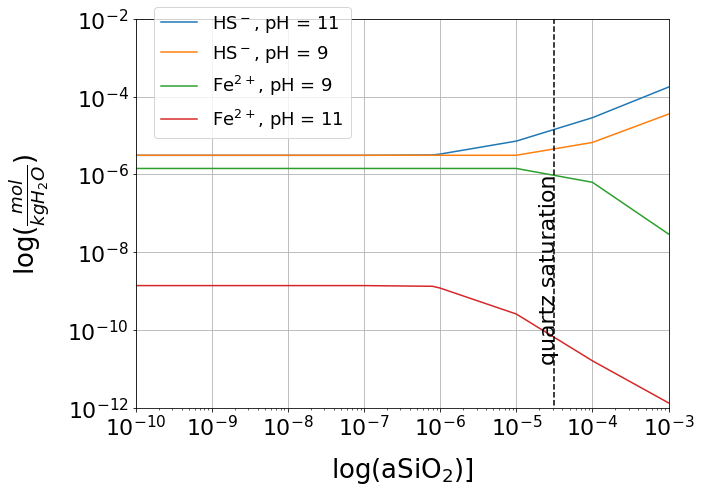

In [8]:
fig8 = plt.figure(8) 
fig8.set_figheight(9)
fig8.set_figwidth(10)
plt.loglog(SiO2_11, HS_11, label = 'HS$^-$, pH = 11')
plt.loglog(SiO2_9, HS_9, label = 'HS$^-$, pH = 9')
plt.loglog(SiO2_9, Fe_9, label = 'Fe$^{2+}$, pH = 9')
plt.loglog(SiO2_11, Fe_11, label = 'Fe$^{2+}$, pH = 11')
plt.plot([quartz, quartz], [10**-14, 10**-2], 'k--')
plt.text(10**-4.7, 10**-6.4, 'quartz saturation', fontsize = 22, rotation = 90)
plt.xlabel('log(aSiO$_2$)]')
plt.ylabel(r'log($\frac{mol}{kg H_2O}$)')
plt.xlim(10**-10,10**-3)
plt.ylim(10**-12,10**-2)
plt.legend(bbox_to_anchor=(0.42,0.67), prop={'size': 18})
plt.grid()
plt.subplots_adjust(left=0.16, right=0.9, top=0.9, bottom=0.3)
plt.savefig('red_conc.png')